\author{Fan Jiang, 11310129}

# Introduction

This document is the solution on the DCT for the DSP Autumn 2015 session.

# Solutions

In [10]:
%load_ext oct2py.ipython

%pylab --no-import-all inline
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'
%load_ext cython

The oct2py.ipython extension is already loaded. To reload it, use:
  %reload_ext oct2py.ipython
Populating the interactive namespace from numpy and matplotlib


In [146]:
import scipy
lena = scipy.misc.lena()

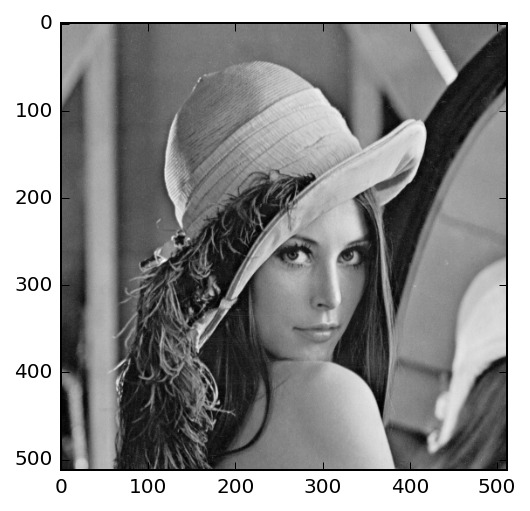

In [91]:
plt.figure()
lena=np.float64(lena)
plt.imshow(lena,cmap='gray')

In [92]:
def DCT2_8V8(img):
    from scipy.fftpack import dct
    img2 = numpy.empty(shape=(img.shape[0], img.shape[1]))
    for startY in xrange(0, img.shape[0], 8):
        for startX in xrange(0, img.shape[1], 8):
            block = img[startY:startY+8, startX:startX+8]

            dst = dct(dct(block.T).T)
            for y in xrange(8):
                for x in xrange(8):
                    img2[startY+y, startX+x] = dst[y, x]
    return img2

def IDCT2_8V8(img):
    from scipy.fftpack import idct
    img2 = numpy.empty(shape=(img.shape[0], img.shape[1]))
    for startY in xrange(0, img.shape[0], 8):
        for startX in xrange(0, img.shape[1], 8):
            block = img[startY:startY+8, startX:startX+8]

            dst = idct(idct(block.T).T)
                
            for y in xrange(8):
                for x in xrange(8):
                    img2[startY+y, startX+x] = dst[y, x]
    return img2

(4634117736.0, 4805.1741430924731)

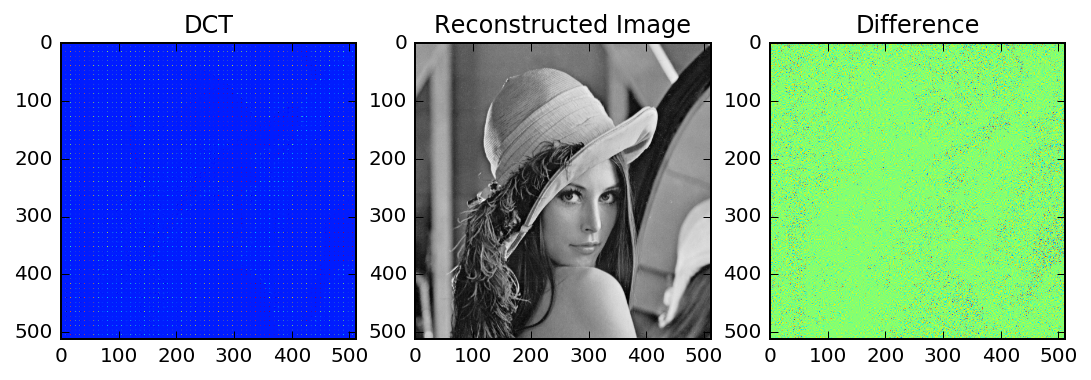

In [144]:
dctimg=DCT2_8V8(lena)
dctimg[numpy.abs(dctimg)<10]=0
img_recon=IDCT2_8V8(dctimg)
plt.figure(figsize=(9,3))
gs = matplotlib.gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1]) 
a0=plt.subplot(gs[0])
a0.imshow(dctimg)
a0.set_title('DCT')
a1=plt.subplot(gs[1])
a1.imshow(numpy.array(img_recon)/256,cmap='gray')
a1.set_title('Reconstructed Image')
a2=plt.subplot(gs[2])
a2.imshow(lena-numpy.float64(img_recon)/256)
a2.set_title('Difference')
(numpy.sum((lena)**2),numpy.sum((img_recon/256-lena)**2))

In [127]:
difs=[]
nzs=[]
dctimg=DCT2_8V8(lena)
for a in xrange(0,4000,40):
    dctimg_t=dctimg
    dct_zeros=numpy.abs(dctimg_t)<a
    dctimg_t[dct_zeros]=0
    img_recon_t=IDCT2_8V8(dctimg_t)
    difs.append(numpy.sum((img_recon_t/256-lena)**2))
    nzs.append(numpy.sum(dct_zeros))

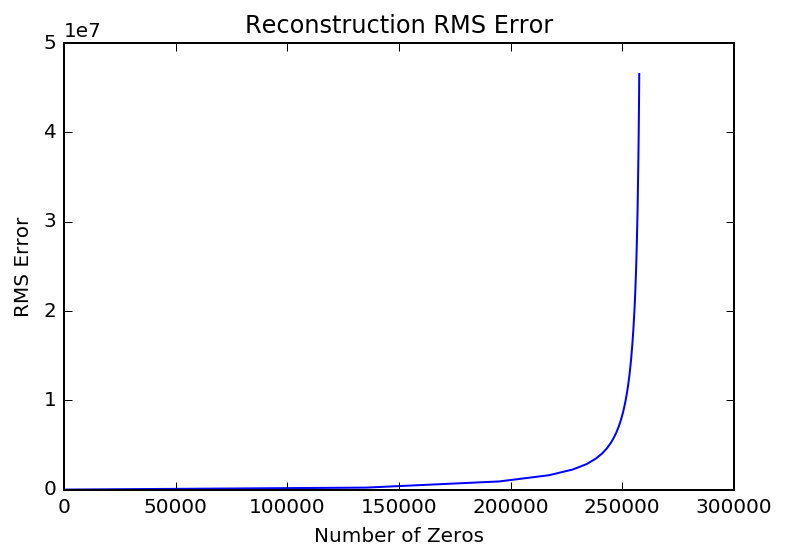

In [145]:
plt.figure()
plt.plot(nzs,difs)
plt.title('Reconstruction RMS Error')
plt.xlabel('Number of Zeros')
plt.ylabel('RMS Error')